In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv('../../../이적료_예측/FIFA_train.csv', encoding='utf-8')
train

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8927,16925,S. Adewusi,18,africa,2019,MF,right,1.0,48,63,3.0,60000.0
8928,16936,C. Ehlich,19,europe,2020,DF,right,1.0,47,59,2.0,40000.0
8929,16941,N. Fuentes,18,south america,2021,DF,right,1.0,47,64,2.0,50000.0
8930,16942,J. Milli,18,europe,2021,GK,right,1.0,47,65,1.0,50000.0


In [3]:
test = pd.read_csv('../../../이적료_예측/FIFA_test.csv', encoding='utf-8')
test

,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0
...,...,...,...,...,...,...,...,...,...,...,...
3823,16924,R. Takae,20,asia,2021,MF,right,1.0,48,63,2.0
3824,16929,L. Wahlstedt,18,europe,2018,GK,right,1.0,48,65,1.0
3825,16932,Y. Góez,18,south america,2021,MF,right,1.0,48,65,2.0
3826,16937,A. Kaltner,18,europe,2020,ST,right,1.0,47,61,2.0


In [4]:
# id와 name 컬럼 삭제
train.drop(['id','name'], axis =1, inplace =True)
test.drop(['id','name'], axis =1, inplace =True)

### feature selection

In [5]:
features = ['age','stat_skill_moves','reputation','stat_overall']
target = ['value']

In [6]:
from sklearn.model_selection import train_test_split

x = train[features]
y = train['value']

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size=0.2, random_state=17)
x_test = test[features]

### 모델링 RF

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=500)

forest.fit(x_train, y_train)

RandomForestRegressor(n_estimators=500)

In [8]:
forest_train_pred = forest.predict(x_train)
forest_valid_pred = forest.predict(x_valid)
forest_test_pred = forest.predict(x_test)

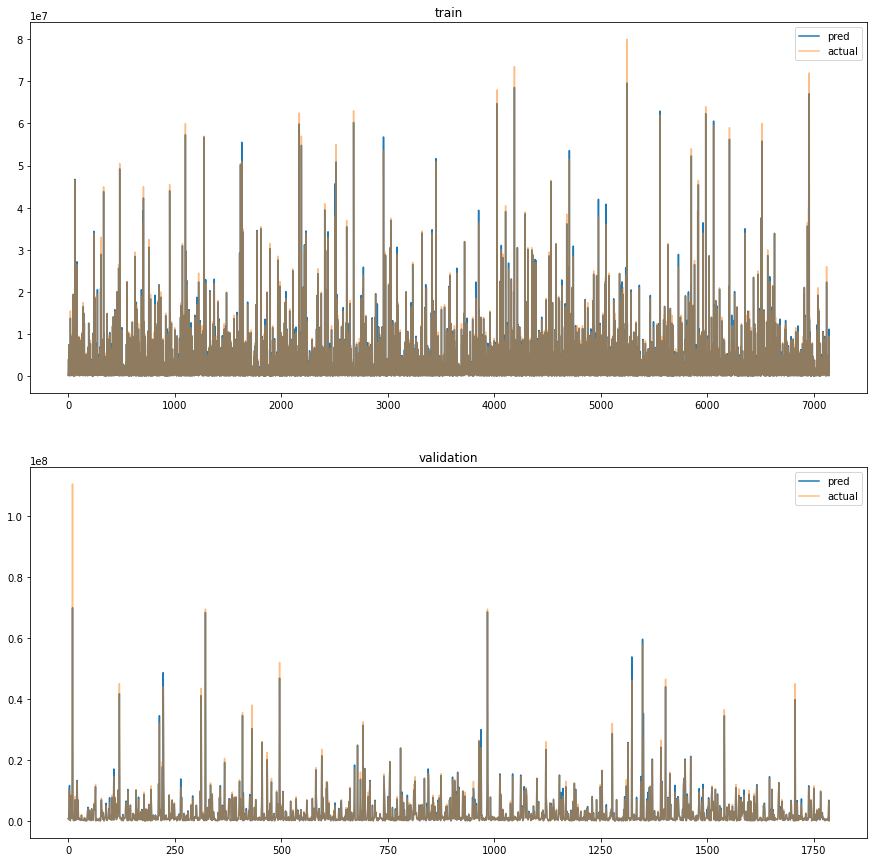

In [9]:
fig, ax = plt.subplots(2,1,figsize=(15,15))

ax1 = plt.subplot(2,1,1)
ax1.plot(forest_train_pred, label='pred')
ax1.plot(y_train.values, label='actual', alpha=0.5)
ax1.legend(loc='upper right')
ax1.set_title('train')

ax2 = plt.subplot(2,1,2)
ax2.plot(forest_valid_pred, label='pred')
ax2.plot(y_valid.values, label='actual', alpha=0.5)
ax2.legend(loc='upper right')
ax2.set_title('validation')

plt.show()

In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

def rmse(act, pred):
    return mean_squared_error(act, pred)**0.5

print('< train >')
print('RMSE : ', rmse(y_train, forest_train_pred))
print('MAPE : ', mean_absolute_percentage_error(y_train, forest_train_pred))

print('< validation >')
print('RMSE : ', rmse(y_valid, forest_valid_pred))
print('MAPE : ', mean_absolute_percentage_error(y_valid, forest_valid_pred))

< train >
RMSE :  422138.7190544275
MAPE :  0.080874394936641
< validation >
RMSE :  1129193.968778086
MAPE :  0.10311563655242242


### 모델링 LGBM

In [11]:
from lightgbm import LGBMRegressor
import lightgbm
from sklearn.model_selection import cross_val_score, KFold


#모델 정의
lgb = LGBMRegressor()
# 모델 학습
lgb.fit(x_train, y_train)

# train, valid 데이터 예측
lgb_train_pred = lgb.predict(x_train)
lgb_valid_pred = lgb.predict(x_valid)
lgb_test_pred = lgb.predict(x_test)

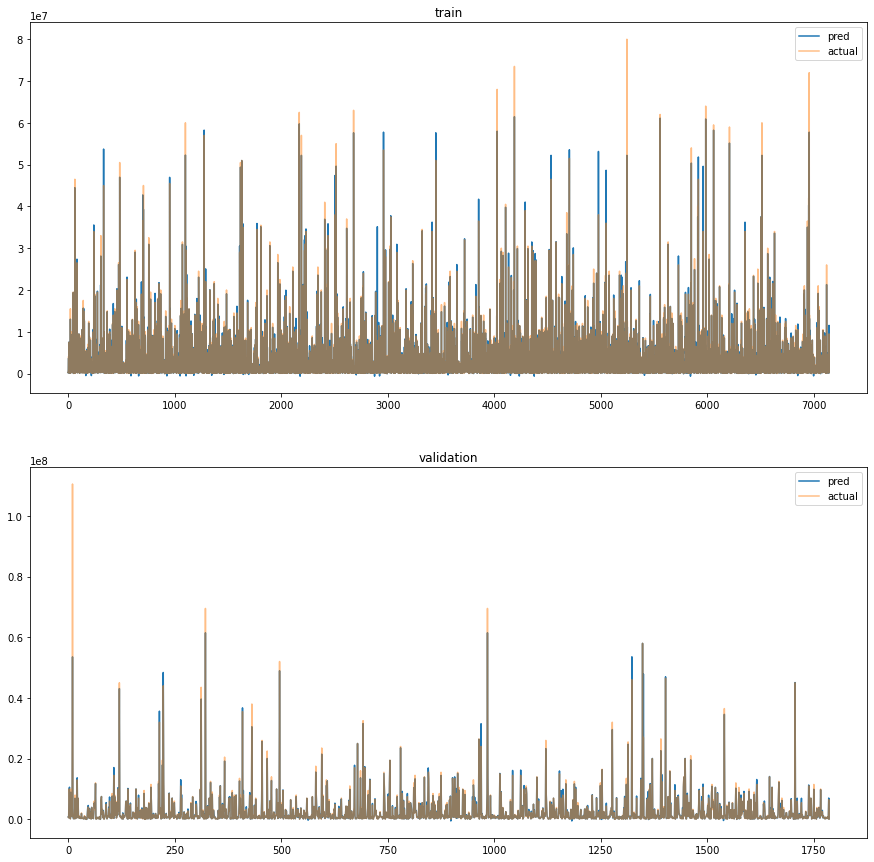

In [12]:
fig, ax = plt.subplots(2,1,figsize=(15,15))

ax1 = plt.subplot(2,1,1)
ax1.plot(lgb_train_pred, label='pred')
ax1.plot(y_train.values, label='actual', alpha=0.5)
ax1.legend(loc='upper right')
ax1.set_title('train')

ax2 = plt.subplot(2,1,2)
ax2.plot(lgb_valid_pred, label='pred')
ax2.plot(y_valid.values, label='actual', alpha=0.5)
ax2.legend(loc='upper right')
ax2.set_title('validation')

plt.show()

In [13]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

def rmse(act, pred):
    return mean_squared_error(act, pred)**0.5

print('< train >')
print('RMSE : ', rmse(y_train, lgb_train_pred))
print('MAPE : ', mean_absolute_percentage_error(y_train, lgb_train_pred))

print('< validation >')
print('RMSE : ', rmse(y_valid, lgb_valid_pred))
print('MAPE : ', mean_absolute_percentage_error(y_valid, lgb_valid_pred))

< train >
RMSE :  803938.6148276745
MAPE :  0.13738720943571703
< validation >
RMSE :  1557358.2406706705
MAPE :  0.13635516016334806


### 모델링 CatBoost

In [14]:
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostRegressor
import random

In [15]:
param = {'depth' : [2,3,4,5,6,7,8,9,10],
         'learning_rate' : [0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.2, 0.25]}

grid_cat = GridSearchCV(CatBoostRegressor(random_state = 2022), 
                        param, 
                        cv = KFold(n_splits = 5, shuffle = True, random_state = 2022), 
                        scoring = 'neg_mean_squared_error', 
                        n_jobs = -1,
                        verbose = 1)

In [16]:
grid_cat.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
0:	learn: 5550008.4611309	total: 132ms	remaining: 2m 12s
1:	learn: 5324041.6537745	total: 133ms	remaining: 1m 6s
2:	learn: 5114459.5961500	total: 134ms	remaining: 44.6s
3:	learn: 4915485.5985701	total: 135ms	remaining: 33.7s
4:	learn: 4736368.7811921	total: 136ms	remaining: 27.1s
5:	learn: 4553205.6742154	total: 137ms	remaining: 22.7s
6:	learn: 4384561.8962023	total: 138ms	remaining: 19.5s
7:	learn: 4225983.0340935	total: 139ms	remaining: 17.2s
8:	learn: 4065197.6039623	total: 139ms	remaining: 15.4s
9:	learn: 3916054.0425648	total: 140ms	remaining: 13.9s
10:	learn: 3774198.1622993	total: 141ms	remaining: 12.7s
11:	learn: 3632435.3618033	total: 142ms	remaining: 11.7s
12:	learn: 3501456.1798659	total: 143ms	remaining: 10.8s
13:	learn: 3383022.0772770	total: 144ms	remaining: 10.1s
14:	learn: 3267298.7143480	total: 144ms	remaining: 9.49s
15:	learn: 3152511.3835053	total: 145ms	remaining: 8.94s
16:	learn: 3045493.6257726	total: 1

209:	learn: 572810.5526494	total: 309ms	remaining: 1.16s
210:	learn: 572425.1560707	total: 310ms	remaining: 1.16s
211:	learn: 571012.4651897	total: 311ms	remaining: 1.16s
212:	learn: 568871.1613856	total: 312ms	remaining: 1.15s
213:	learn: 568419.4603573	total: 313ms	remaining: 1.15s
214:	learn: 568054.1351154	total: 313ms	remaining: 1.14s
215:	learn: 566818.4069502	total: 314ms	remaining: 1.14s
216:	learn: 566569.8563047	total: 315ms	remaining: 1.14s
217:	learn: 566107.9296759	total: 316ms	remaining: 1.13s
218:	learn: 565668.9718963	total: 317ms	remaining: 1.13s
219:	learn: 564523.6596521	total: 318ms	remaining: 1.13s
220:	learn: 564331.8669528	total: 319ms	remaining: 1.12s
221:	learn: 563236.4294135	total: 320ms	remaining: 1.12s
222:	learn: 563052.6579486	total: 320ms	remaining: 1.12s
223:	learn: 561928.0909520	total: 321ms	remaining: 1.11s
224:	learn: 561284.8910185	total: 322ms	remaining: 1.11s
225:	learn: 560588.7071766	total: 323ms	remaining: 1.11s
226:	learn: 559435.7697223	tota

421:	learn: 477217.1805391	total: 489ms	remaining: 669ms
422:	learn: 476955.8971005	total: 490ms	remaining: 668ms
423:	learn: 476641.9806082	total: 491ms	remaining: 666ms
424:	learn: 476362.3325294	total: 491ms	remaining: 665ms
425:	learn: 476141.0225743	total: 492ms	remaining: 663ms
426:	learn: 475969.9663950	total: 493ms	remaining: 662ms
427:	learn: 475789.4107181	total: 494ms	remaining: 660ms
428:	learn: 475492.2335347	total: 495ms	remaining: 659ms
429:	learn: 475249.4946812	total: 496ms	remaining: 657ms
430:	learn: 475009.4042101	total: 497ms	remaining: 656ms
431:	learn: 474772.3035735	total: 498ms	remaining: 654ms
432:	learn: 474386.8541303	total: 499ms	remaining: 653ms
433:	learn: 474246.6566215	total: 500ms	remaining: 652ms
434:	learn: 473559.0529190	total: 501ms	remaining: 650ms
435:	learn: 472911.3957683	total: 501ms	remaining: 649ms
436:	learn: 472660.7034739	total: 502ms	remaining: 647ms
437:	learn: 472050.8562856	total: 503ms	remaining: 646ms
438:	learn: 471926.2627159	tota

617:	learn: 436577.0803164	total: 659ms	remaining: 407ms
618:	learn: 436533.3691857	total: 660ms	remaining: 406ms
619:	learn: 436356.9222872	total: 661ms	remaining: 405ms
620:	learn: 436187.8962162	total: 662ms	remaining: 404ms
621:	learn: 436167.1111495	total: 663ms	remaining: 403ms
622:	learn: 436146.8561559	total: 663ms	remaining: 401ms
623:	learn: 435792.9242807	total: 664ms	remaining: 400ms
624:	learn: 435728.0846527	total: 665ms	remaining: 399ms
625:	learn: 435492.3602688	total: 666ms	remaining: 398ms
626:	learn: 435449.1065090	total: 667ms	remaining: 397ms
627:	learn: 435336.8783087	total: 668ms	remaining: 395ms
628:	learn: 435158.5339687	total: 668ms	remaining: 394ms
629:	learn: 435138.7767772	total: 669ms	remaining: 393ms
630:	learn: 435078.4828008	total: 670ms	remaining: 392ms
631:	learn: 435059.1987567	total: 671ms	remaining: 391ms
632:	learn: 435040.4070307	total: 672ms	remaining: 390ms
633:	learn: 435010.6352557	total: 673ms	remaining: 388ms
634:	learn: 434772.2491034	tota

828:	learn: 413788.4523592	total: 835ms	remaining: 172ms
829:	learn: 413756.4935776	total: 836ms	remaining: 171ms
830:	learn: 413616.9239416	total: 837ms	remaining: 170ms
831:	learn: 413583.7635506	total: 838ms	remaining: 169ms
832:	learn: 413547.0323579	total: 839ms	remaining: 168ms
833:	learn: 413463.0872336	total: 840ms	remaining: 167ms
834:	learn: 413413.1689351	total: 841ms	remaining: 166ms
835:	learn: 413380.8610213	total: 842ms	remaining: 165ms
836:	learn: 413281.5234943	total: 843ms	remaining: 164ms
837:	learn: 413134.8847801	total: 843ms	remaining: 163ms
838:	learn: 412986.4361042	total: 844ms	remaining: 162ms
839:	learn: 412969.3252552	total: 845ms	remaining: 161ms
840:	learn: 412952.8629109	total: 846ms	remaining: 160ms
841:	learn: 412725.1585835	total: 847ms	remaining: 159ms
842:	learn: 412583.8948246	total: 847ms	remaining: 158ms
843:	learn: 412374.4714121	total: 848ms	remaining: 157ms
844:	learn: 412294.9738785	total: 849ms	remaining: 156ms
845:	learn: 412279.0152920	tota

GridSearchCV(cv=KFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=<catboost.core.CatBoostRegressor object at 0x0000024E55DF5700>,
             n_jobs=-1,
             param_grid={'depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'learning_rate': [0.0005, 0.001, 0.005, 0.01, 0.05,
                                           0.1, 0.2, 0.25]},
             scoring='neg_mean_squared_error', verbose=1)

In [17]:
cat = CatBoostRegressor(random_state = 2022, **grid_cat.best_params_)
cat.fit(x_train, y_train)

0:	learn: 5550008.4611309	total: 976us	remaining: 975ms
1:	learn: 5324041.6537745	total: 2.17ms	remaining: 1.08s
2:	learn: 5114459.5961500	total: 3.16ms	remaining: 1.05s
3:	learn: 4915485.5985701	total: 4.08ms	remaining: 1.01s
4:	learn: 4736368.7811921	total: 4.97ms	remaining: 989ms
5:	learn: 4553205.6742154	total: 5.9ms	remaining: 978ms
6:	learn: 4384561.8962023	total: 6.83ms	remaining: 969ms
7:	learn: 4225983.0340935	total: 7.72ms	remaining: 958ms
8:	learn: 4065197.6039623	total: 8.59ms	remaining: 946ms
9:	learn: 3916054.0425648	total: 9.56ms	remaining: 946ms
10:	learn: 3774198.1622993	total: 10.5ms	remaining: 943ms
11:	learn: 3632435.3618033	total: 11.4ms	remaining: 941ms
12:	learn: 3501456.1798659	total: 12.3ms	remaining: 937ms
13:	learn: 3383022.0772770	total: 13.3ms	remaining: 936ms
14:	learn: 3267298.7143480	total: 14.2ms	remaining: 932ms
15:	learn: 3152511.3835053	total: 15.1ms	remaining: 929ms
16:	learn: 3045493.6257726	total: 16.1ms	remaining: 929ms
17:	learn: 2942604.5675248

199:	learn: 581948.6150738	total: 183ms	remaining: 731ms
200:	learn: 581638.9159895	total: 184ms	remaining: 731ms
201:	learn: 579824.4020665	total: 185ms	remaining: 730ms
202:	learn: 578884.0585854	total: 186ms	remaining: 729ms
203:	learn: 578328.3044499	total: 187ms	remaining: 728ms
204:	learn: 577749.7356561	total: 187ms	remaining: 727ms
205:	learn: 577262.8024381	total: 188ms	remaining: 726ms
206:	learn: 576928.0205228	total: 189ms	remaining: 725ms
207:	learn: 576068.7781009	total: 190ms	remaining: 724ms
208:	learn: 574034.9763432	total: 191ms	remaining: 724ms
209:	learn: 572810.5526494	total: 192ms	remaining: 723ms
210:	learn: 572425.1560707	total: 193ms	remaining: 722ms
211:	learn: 571012.4651897	total: 194ms	remaining: 721ms
212:	learn: 568871.1613856	total: 195ms	remaining: 719ms
213:	learn: 568419.4603573	total: 196ms	remaining: 719ms
214:	learn: 568054.1351154	total: 197ms	remaining: 718ms
215:	learn: 566818.4069502	total: 198ms	remaining: 717ms
216:	learn: 566569.8563047	tota

396:	learn: 483508.6703188	total: 362ms	remaining: 550ms
397:	learn: 483193.7717262	total: 363ms	remaining: 549ms
398:	learn: 482898.1748022	total: 364ms	remaining: 548ms
399:	learn: 482665.9709430	total: 365ms	remaining: 547ms
400:	learn: 482335.5370868	total: 366ms	remaining: 547ms
401:	learn: 482126.2379868	total: 367ms	remaining: 546ms
402:	learn: 481888.4385593	total: 368ms	remaining: 545ms
403:	learn: 481699.5961080	total: 369ms	remaining: 544ms
404:	learn: 481445.6450664	total: 370ms	remaining: 543ms
405:	learn: 481081.7221426	total: 370ms	remaining: 542ms
406:	learn: 480759.4456304	total: 371ms	remaining: 541ms
407:	learn: 480657.2772183	total: 373ms	remaining: 541ms
408:	learn: 480466.5148605	total: 373ms	remaining: 540ms
409:	learn: 480279.7135381	total: 374ms	remaining: 539ms
410:	learn: 480107.0407020	total: 375ms	remaining: 538ms
411:	learn: 479837.9252723	total: 376ms	remaining: 537ms
412:	learn: 479645.9887076	total: 377ms	remaining: 536ms
413:	learn: 479231.6765479	tota

575:	learn: 442338.8724756	total: 525ms	remaining: 387ms
576:	learn: 442304.0207562	total: 526ms	remaining: 386ms
577:	learn: 442079.7832949	total: 527ms	remaining: 385ms
578:	learn: 442045.9051446	total: 528ms	remaining: 384ms
579:	learn: 441802.0361263	total: 529ms	remaining: 383ms
580:	learn: 441568.6313140	total: 530ms	remaining: 382ms
581:	learn: 441077.0770839	total: 531ms	remaining: 381ms
582:	learn: 440947.7700726	total: 532ms	remaining: 380ms
583:	learn: 440730.6860239	total: 533ms	remaining: 379ms
584:	learn: 440535.1043789	total: 534ms	remaining: 378ms
585:	learn: 440500.7372510	total: 534ms	remaining: 378ms
586:	learn: 440467.3757768	total: 536ms	remaining: 377ms
587:	learn: 440248.7131733	total: 536ms	remaining: 376ms
588:	learn: 439795.9777078	total: 537ms	remaining: 375ms
589:	learn: 439555.2763473	total: 538ms	remaining: 374ms
590:	learn: 439434.5781051	total: 539ms	remaining: 373ms
591:	learn: 439401.7892556	total: 540ms	remaining: 372ms
592:	learn: 439218.1898183	tota

782:	learn: 418598.1863998	total: 712ms	remaining: 197ms
783:	learn: 418534.7070316	total: 713ms	remaining: 196ms
784:	learn: 418472.9797199	total: 714ms	remaining: 196ms
785:	learn: 418437.0246807	total: 715ms	remaining: 195ms
786:	learn: 418340.6232782	total: 716ms	remaining: 194ms
787:	learn: 418261.7168203	total: 717ms	remaining: 193ms
788:	learn: 418202.8499656	total: 717ms	remaining: 192ms
789:	learn: 418154.8225974	total: 718ms	remaining: 191ms
790:	learn: 418120.2278864	total: 719ms	remaining: 190ms
791:	learn: 417937.5881054	total: 720ms	remaining: 189ms
792:	learn: 417812.4311104	total: 721ms	remaining: 188ms
793:	learn: 417683.6003424	total: 722ms	remaining: 187ms
794:	learn: 417604.3075609	total: 723ms	remaining: 186ms
795:	learn: 417459.3231029	total: 724ms	remaining: 186ms
796:	learn: 417411.9675005	total: 725ms	remaining: 185ms
797:	learn: 417224.7886905	total: 726ms	remaining: 184ms
798:	learn: 417185.1029689	total: 727ms	remaining: 183ms
799:	learn: 417024.5288951	tota

977:	learn: 404915.7442329	total: 887ms	remaining: 19.9ms
978:	learn: 404864.1056913	total: 888ms	remaining: 19ms
979:	learn: 404743.9810076	total: 889ms	remaining: 18.1ms
980:	learn: 404647.1883805	total: 890ms	remaining: 17.2ms
981:	learn: 404635.9309798	total: 891ms	remaining: 16.3ms
982:	learn: 404625.1140922	total: 892ms	remaining: 15.4ms
983:	learn: 404614.8006669	total: 893ms	remaining: 14.5ms
984:	learn: 404605.2428942	total: 893ms	remaining: 13.6ms
985:	learn: 404498.1807991	total: 894ms	remaining: 12.7ms
986:	learn: 404428.6554757	total: 895ms	remaining: 11.8ms
987:	learn: 404299.7454764	total: 896ms	remaining: 10.9ms
988:	learn: 404290.4764699	total: 897ms	remaining: 9.98ms
989:	learn: 404270.5739212	total: 898ms	remaining: 9.07ms
990:	learn: 404260.2494477	total: 899ms	remaining: 8.16ms
991:	learn: 404225.2669203	total: 900ms	remaining: 7.26ms
992:	learn: 404136.0013794	total: 901ms	remaining: 6.35ms
993:	learn: 404033.8847611	total: 902ms	remaining: 5.44ms
994:	learn: 4039

In [18]:
cat_train_pred = cat.predict(x_train)
cat_valid_pred = cat.predict(x_valid)
cat_test_pred = cat.predict(x_test)

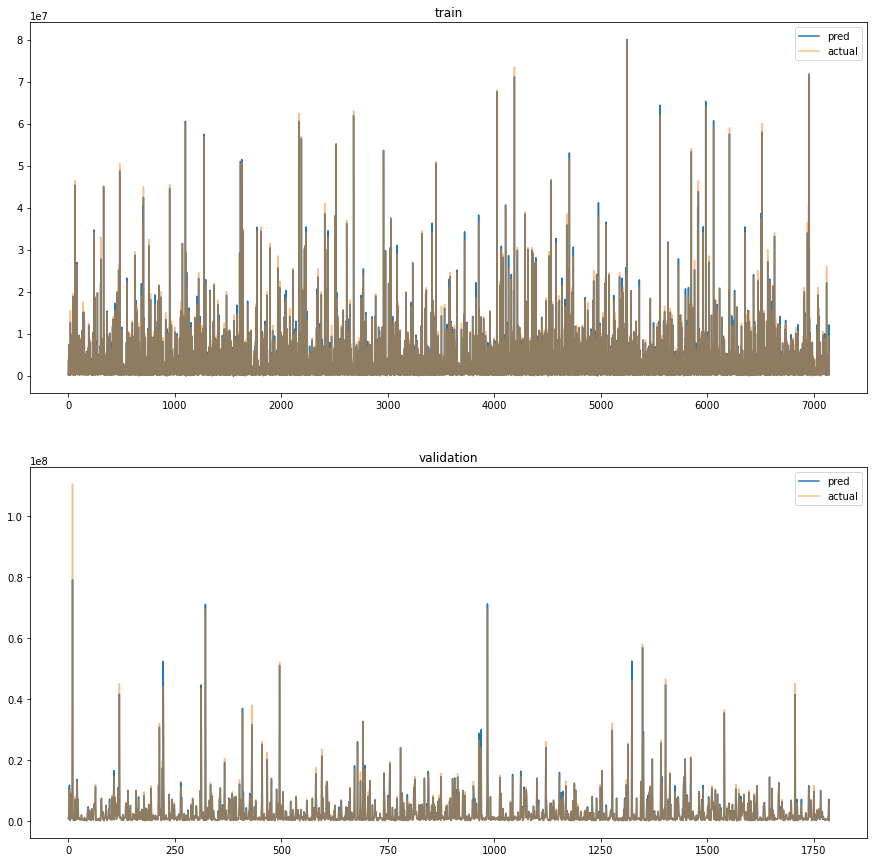

In [19]:
fig, ax = plt.subplots(2,1,figsize=(15,15))

ax1 = plt.subplot(2,1,1)
ax1.plot(cat_train_pred, label='pred')
ax1.plot(y_train.values, label='actual', alpha=0.5)
ax1.legend(loc='upper right')
ax1.set_title('train')

ax2 = plt.subplot(2,1,2)
ax2.plot(cat_valid_pred, label='pred')
ax2.plot(y_valid.values, label='actual', alpha=0.5)
ax2.legend(loc='upper right')
ax2.set_title('validation')

plt.show()

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

def rmse(act, pred):
    return mean_squared_error(act, pred)**0.5

print('< train >')
print('RMSE : ', rmse(y_train, cat_train_pred))
print('MAPE : ', mean_absolute_percentage_error(y_train, cat_train_pred))

print('< validation >')
print('RMSE : ', rmse(y_valid, cat_valid_pred))
print('MAPE : ', mean_absolute_percentage_error(y_valid, cat_valid_pred))

< train >
RMSE :  403852.5996946302
MAPE :  0.1268516003490508
< validation >
RMSE :  903757.5684671779
MAPE :  0.12596790197784785


### 모델링 NGB

In [21]:
from ngboost import NGBRegressor

ngb = NGBRegressor(random_state = 2022)

cv_ngb = cross_val_score(ngb, x, y, cv = KFold(n_splits = 5, random_state = 2022, shuffle = True), scoring = 'neg_mean_squared_error')
cv_ngb.mean()

[iter 0] loss=16.9860 val_loss=0.0000 scale=2.0000 norm=6100393.2501


C:\Users\dydgm\anaconda3\envs\DA\lib\site-packages\ngboost\distns\normal.py:68: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2
C:\Users\dydgm\anaconda3\envs\DA\lib\site-packages\ngboost\distns\normal.py:67: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])


[iter 100] loss=15.6828 val_loss=0.0000 scale=2.0000 norm=1362413.0166
[iter 200] loss=14.8109 val_loss=0.0000 scale=2.0000 norm=722937.6293
[iter 300] loss=14.1072 val_loss=0.0000 scale=2.0000 norm=540296.9340
[iter 400] loss=13.6791 val_loss=0.0000 scale=1.0000 norm=242288.6509


C:\Users\dydgm\anaconda3\envs\DA\lib\site-packages\ngboost\distns\normal.py:68: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 0] loss=17.0188 val_loss=0.0000 scale=2.0000 norm=6254840.6344
[iter 100] loss=15.7142 val_loss=0.0000 scale=2.0000 norm=1402566.6813
[iter 200] loss=14.8394 val_loss=0.0000 scale=2.0000 norm=744191.1879
[iter 300] loss=14.1369 val_loss=0.0000 scale=2.0000 norm=577382.9987
[iter 400] loss=13.7105 val_loss=0.0000 scale=2.0000 norm=517094.1861


C:\Users\dydgm\anaconda3\envs\DA\lib\site-packages\ngboost\distns\normal.py:68: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2


[iter 0] loss=17.0231 val_loss=0.0000 scale=2.0000 norm=6278162.3723
[iter 100] loss=15.7176 val_loss=0.0000 scale=2.0000 norm=1400202.7479
[iter 200] loss=14.8447 val_loss=0.0000 scale=2.0000 norm=749350.6141
[iter 300] loss=14.1339 val_loss=0.0000 scale=2.0000 norm=562993.9929
[iter 400] loss=13.6861 val_loss=0.0000 scale=2.0000 norm=503397.9088


C:\Users\dydgm\anaconda3\envs\DA\lib\site-packages\ngboost\distns\normal.py:68: RuntimeWarning: overflow encountered in square
  self.var = self.scale ** 2
C:\Users\dydgm\anaconda3\envs\DA\lib\site-packages\ngboost\distns\normal.py:67: RuntimeWarning: overflow encountered in exp
  self.scale = np.exp(params[1])


[iter 0] loss=16.9819 val_loss=0.0000 scale=2.0000 norm=5980768.5052
[iter 100] loss=15.6778 val_loss=0.0000 scale=2.0000 norm=1367514.7903
[iter 200] loss=14.8060 val_loss=0.0000 scale=2.0000 norm=722200.3229
[iter 300] loss=14.1092 val_loss=0.0000 scale=2.0000 norm=550724.4999
[iter 400] loss=13.7102 val_loss=0.0000 scale=1.0000 norm=247082.5998
[iter 0] loss=16.9849 val_loss=0.0000 scale=2.0000 norm=6151495.8419
[iter 100] loss=15.6834 val_loss=0.0000 scale=2.0000 norm=1360086.1273
[iter 200] loss=14.8086 val_loss=0.0000 scale=2.0000 norm=710943.7469
[iter 300] loss=14.0963 val_loss=0.0000 scale=2.0000 norm=535171.4710
[iter 400] loss=13.6527 val_loss=0.0000 scale=2.0000 norm=480998.1485


-760116853426.5118

In [22]:
ngb.fit(x_train, y_train)

ngb_train_pred = ngb.predict(x_train)
ngb_valid_pred = ngb.predict(x_valid)
ngb_test_pred = ngb.predict(x_test)

[iter 0] loss=16.9871 val_loss=0.0000 scale=2.0000 norm=6184672.8978
[iter 100] loss=15.6858 val_loss=0.0000 scale=2.0000 norm=1364072.5963
[iter 200] loss=14.8148 val_loss=0.0000 scale=2.0000 norm=724955.6886
[iter 300] loss=14.1021 val_loss=0.0000 scale=2.0000 norm=541543.2206
[iter 400] loss=13.6610 val_loss=0.0000 scale=2.0000 norm=492590.7730


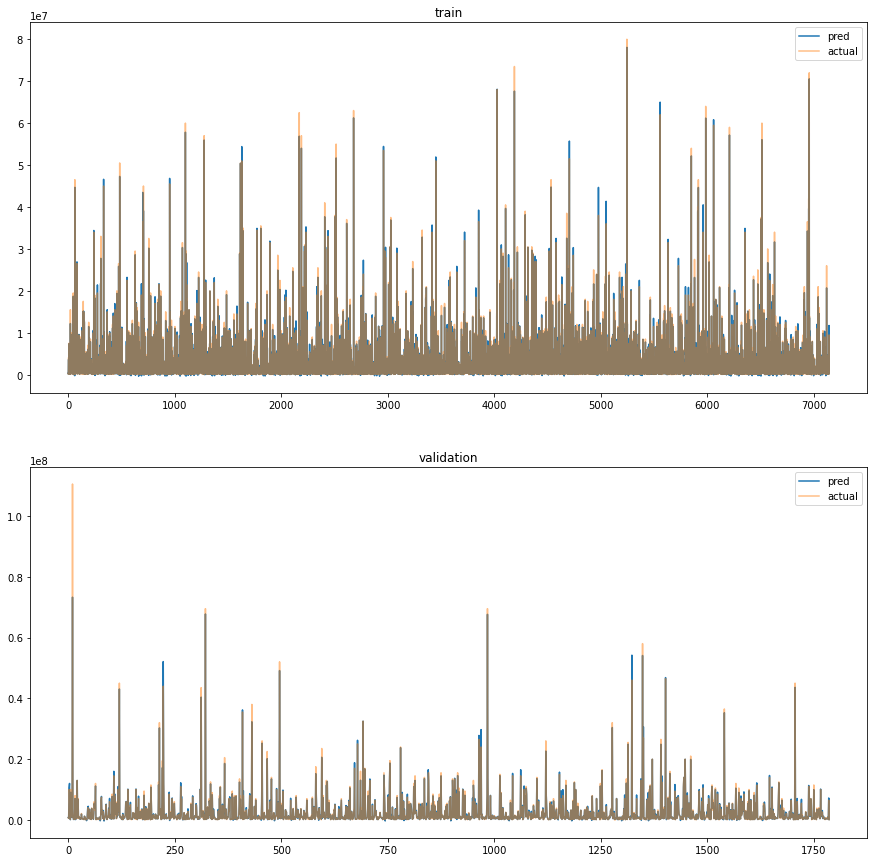

In [23]:
fig, ax = plt.subplots(2,1,figsize=(15,15))

ax1 = plt.subplot(2,1,1)
ax1.plot(ngb_train_pred, label='pred')
ax1.plot(y_train.values, label='actual', alpha=0.5)
ax1.legend(loc='upper right')
ax1.set_title('train')

ax2 = plt.subplot(2,1,2)
ax2.plot(ngb_valid_pred, label='pred')
ax2.plot(y_valid.values, label='actual', alpha=0.5)
ax2.legend(loc='upper right')
ax2.set_title('validation')

plt.show()

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

def rmse(act, pred):
    return mean_squared_error(act, pred)**0.5

print('< train >')
print('RMSE : ', rmse(y_train,ngb_train_pred))
print('MAPE : ', mean_absolute_percentage_error(y_train, ngb_train_pred))

print('< validation >')
print('RMSE : ', rmse(y_valid,ngb_valid_pred))
print('MAPE : ', mean_absolute_percentage_error(y_valid, ngb_valid_pred))

< train >
RMSE :  507641.4910071695
MAPE :  0.23237827631995095
< validation >
RMSE :  1044768.8513343253
MAPE :  0.25486270449859


### Voting 앙상블

In [25]:
from sklearn.ensemble import VotingRegressor

In [26]:
ngb._estimator_type='regressor'
vot = VotingRegressor(estimators = [('RF', forest), ('lgbm', lgb), ('cat', cat), ('ngb' ,ngb)], weights = [.2, .1, .4, .3])

In [27]:
vot.fit(x_train, y_train)

0:	learn: 5550008.4611309	total: 957us	remaining: 957ms
1:	learn: 5324041.6537745	total: 1.95ms	remaining: 971ms
2:	learn: 5114459.5961500	total: 2.85ms	remaining: 948ms
3:	learn: 4915485.5985701	total: 3.83ms	remaining: 953ms
4:	learn: 4736368.7811921	total: 4.76ms	remaining: 948ms
5:	learn: 4553205.6742154	total: 5.73ms	remaining: 950ms
6:	learn: 4384561.8962023	total: 6.67ms	remaining: 947ms
7:	learn: 4225983.0340935	total: 7.59ms	remaining: 941ms
8:	learn: 4065197.6039623	total: 8.46ms	remaining: 932ms
9:	learn: 3916054.0425648	total: 9.43ms	remaining: 933ms
10:	learn: 3774198.1622993	total: 10.4ms	remaining: 933ms
11:	learn: 3632435.3618033	total: 11.3ms	remaining: 932ms
12:	learn: 3501456.1798659	total: 12.3ms	remaining: 932ms
13:	learn: 3383022.0772770	total: 13.2ms	remaining: 928ms
14:	learn: 3267298.7143480	total: 14.1ms	remaining: 926ms
15:	learn: 3152511.3835053	total: 15.1ms	remaining: 926ms
16:	learn: 3045493.6257726	total: 16ms	remaining: 927ms
17:	learn: 2942604.5675248	

191:	learn: 588581.5922254	total: 178ms	remaining: 750ms
192:	learn: 587875.5712048	total: 179ms	remaining: 749ms
193:	learn: 587205.1850811	total: 180ms	remaining: 748ms
194:	learn: 586930.2360032	total: 181ms	remaining: 747ms
195:	learn: 586569.7883955	total: 182ms	remaining: 746ms
196:	learn: 585077.5213261	total: 183ms	remaining: 745ms
197:	learn: 584124.1859488	total: 184ms	remaining: 744ms
198:	learn: 582996.0661643	total: 185ms	remaining: 743ms
199:	learn: 581948.6150738	total: 186ms	remaining: 742ms
200:	learn: 581638.9159895	total: 186ms	remaining: 741ms
201:	learn: 579824.4020665	total: 187ms	remaining: 740ms
202:	learn: 578884.0585854	total: 188ms	remaining: 739ms
203:	learn: 578328.3044499	total: 189ms	remaining: 738ms
204:	learn: 577749.7356561	total: 190ms	remaining: 736ms
205:	learn: 577262.8024381	total: 191ms	remaining: 736ms
206:	learn: 576928.0205228	total: 192ms	remaining: 734ms
207:	learn: 576068.7781009	total: 193ms	remaining: 733ms
208:	learn: 574034.9763432	tota

375:	learn: 490073.8348549	total: 345ms	remaining: 572ms
376:	learn: 489531.4108050	total: 346ms	remaining: 571ms
377:	learn: 489181.1192493	total: 347ms	remaining: 570ms
378:	learn: 488815.6990137	total: 347ms	remaining: 569ms
379:	learn: 488341.6775845	total: 348ms	remaining: 568ms
380:	learn: 488043.9903259	total: 349ms	remaining: 567ms
381:	learn: 487827.3879226	total: 350ms	remaining: 567ms
382:	learn: 487551.6450844	total: 351ms	remaining: 566ms
383:	learn: 487317.0660817	total: 352ms	remaining: 565ms
384:	learn: 486865.7391667	total: 353ms	remaining: 564ms
385:	learn: 486601.1761175	total: 354ms	remaining: 563ms
386:	learn: 486312.3621124	total: 355ms	remaining: 562ms
387:	learn: 485962.0827517	total: 356ms	remaining: 561ms
388:	learn: 485702.5423291	total: 357ms	remaining: 560ms
389:	learn: 485279.6560881	total: 358ms	remaining: 559ms
390:	learn: 484927.0754171	total: 358ms	remaining: 558ms
391:	learn: 484676.8363918	total: 359ms	remaining: 557ms
392:	learn: 484384.2768978	tota

585:	learn: 440500.7372510	total: 532ms	remaining: 376ms
586:	learn: 440467.3757768	total: 533ms	remaining: 375ms
587:	learn: 440248.7131733	total: 534ms	remaining: 374ms
588:	learn: 439795.9777078	total: 535ms	remaining: 373ms
589:	learn: 439555.2763473	total: 536ms	remaining: 372ms
590:	learn: 439434.5781051	total: 537ms	remaining: 371ms
591:	learn: 439401.7892556	total: 538ms	remaining: 371ms
592:	learn: 439218.1898183	total: 538ms	remaining: 370ms
593:	learn: 439186.2326468	total: 539ms	remaining: 369ms
594:	learn: 439155.2118126	total: 540ms	remaining: 368ms
595:	learn: 438949.0747245	total: 541ms	remaining: 367ms
596:	learn: 438748.8892942	total: 542ms	remaining: 366ms
597:	learn: 438554.0636033	total: 543ms	remaining: 365ms
598:	learn: 438478.8806275	total: 544ms	remaining: 364ms
599:	learn: 438412.3946908	total: 545ms	remaining: 363ms
600:	learn: 438381.7448370	total: 546ms	remaining: 362ms
601:	learn: 438351.9878239	total: 547ms	remaining: 362ms
602:	learn: 438323.0949608	tota

780:	learn: 418766.8597043	total: 707ms	remaining: 198ms
781:	learn: 418663.4767250	total: 708ms	remaining: 197ms
782:	learn: 418598.1863998	total: 709ms	remaining: 196ms
783:	learn: 418534.7070316	total: 710ms	remaining: 196ms
784:	learn: 418472.9797199	total: 711ms	remaining: 195ms
785:	learn: 418437.0246807	total: 712ms	remaining: 194ms
786:	learn: 418340.6232782	total: 713ms	remaining: 193ms
787:	learn: 418261.7168203	total: 713ms	remaining: 192ms
788:	learn: 418202.8499656	total: 714ms	remaining: 191ms
789:	learn: 418154.8225974	total: 715ms	remaining: 190ms
790:	learn: 418120.2278864	total: 716ms	remaining: 189ms
791:	learn: 417937.5881054	total: 717ms	remaining: 188ms
792:	learn: 417812.4311104	total: 718ms	remaining: 187ms
793:	learn: 417683.6003424	total: 719ms	remaining: 186ms
794:	learn: 417604.3075609	total: 720ms	remaining: 186ms
795:	learn: 417459.3231029	total: 721ms	remaining: 185ms
796:	learn: 417411.9675005	total: 721ms	remaining: 184ms
797:	learn: 417224.7886905	tota

968:	learn: 405640.9528684	total: 876ms	remaining: 28ms
969:	learn: 405559.8324479	total: 877ms	remaining: 27.1ms
970:	learn: 405537.0415166	total: 877ms	remaining: 26.2ms
971:	learn: 405466.5374669	total: 878ms	remaining: 25.3ms
972:	learn: 405395.2073259	total: 879ms	remaining: 24.4ms
973:	learn: 405340.7818845	total: 880ms	remaining: 23.5ms
974:	learn: 405245.0465441	total: 881ms	remaining: 22.6ms
975:	learn: 405039.3667556	total: 882ms	remaining: 21.7ms
976:	learn: 405028.6899990	total: 883ms	remaining: 20.8ms
977:	learn: 404915.7442329	total: 884ms	remaining: 19.9ms
978:	learn: 404864.1056913	total: 885ms	remaining: 19ms
979:	learn: 404743.9810076	total: 886ms	remaining: 18.1ms
980:	learn: 404647.1883805	total: 887ms	remaining: 17.2ms
981:	learn: 404635.9309798	total: 888ms	remaining: 16.3ms
982:	learn: 404625.1140922	total: 889ms	remaining: 15.4ms
983:	learn: 404614.8006669	total: 890ms	remaining: 14.5ms
984:	learn: 404605.2428942	total: 890ms	remaining: 13.6ms
985:	learn: 404498

VotingRegressor(estimators=[('RF', RandomForestRegressor(n_estimators=500)),
                            ('lgbm', LGBMRegressor()),
                            ('cat',
                             <catboost.core.CatBoostRegressor object at 0x0000024E55E477C0>),
                            ('ngb',
                             NGBRegressor(random_state=RandomState(MT19937) at 0x24E553D8A40))],
                weights=[0.2, 0.1, 0.4, 0.3])

In [28]:
ens_train_pred = vot.predict(x_train)
ens_valid_pred = vot.predict(x_valid)
ens_test_pred = vot.predict(x_test)

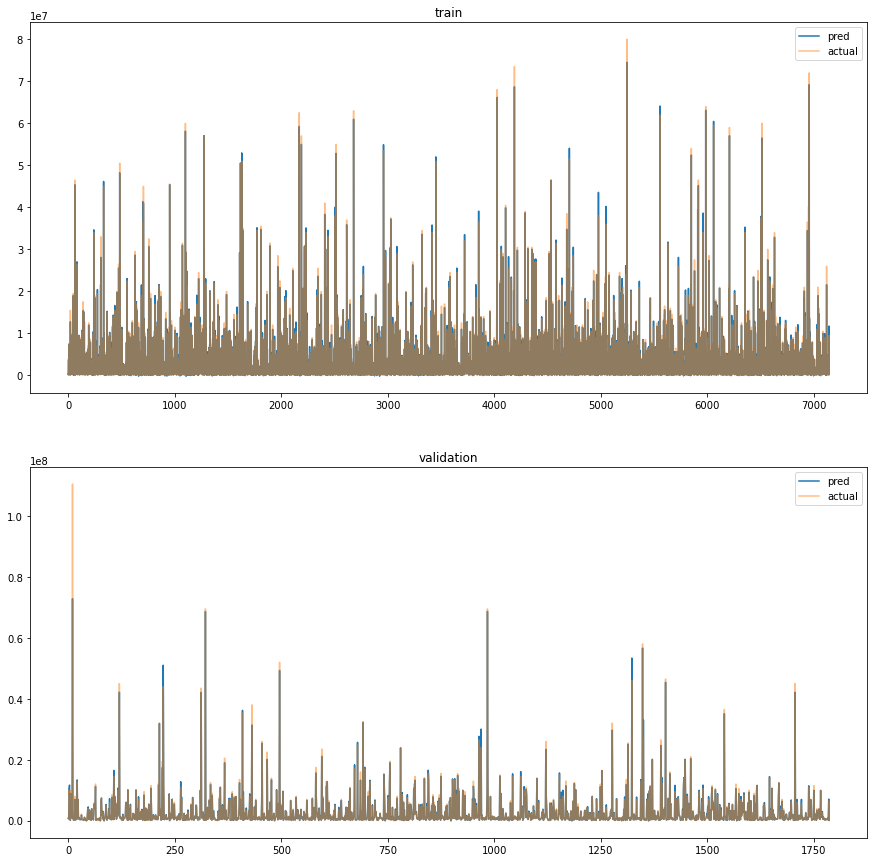

In [29]:
fig, ax = plt.subplots(2,1,figsize=(15,15))

ax1 = plt.subplot(2,1,1)
ax1.plot(ens_train_pred, label='pred')
ax1.plot(y_train.values, label='actual', alpha=0.5)
ax1.legend(loc='upper right')
ax1.set_title('train')

ax2 = plt.subplot(2,1,2)
ax2.plot(ens_valid_pred, label='pred')
ax2.plot(y_valid.values, label='actual', alpha=0.5)
ax2.legend(loc='upper right')
ax2.set_title('validation')

plt.show()

In [30]:
print('< train >')
print('RMSE : ', rmse(y_train,ens_train_pred))
print('MAPE : ', mean_absolute_percentage_error(y_train, ens_train_pred))

print('< validation >')
print('RMSE : ', rmse(y_valid,ens_valid_pred))
print('MAPE : ', mean_absolute_percentage_error(y_valid, ens_valid_pred))

< train >
RMSE :  424406.7511910345
MAPE :  0.13646175248261172
< validation >
RMSE :  1035769.6214476479
MAPE :  0.14556817453511453


### Stacking 앙상블

In [31]:
from sklearn.ensemble import StackingRegressor 
stack = StackingRegressor(estimators = [('lgb', lgb), ('ngb' ,ngb), ('RF' ,forest)], final_estimator=cat)

In [32]:
stack.fit(x_train, y_train)

[iter 0] loss=16.9871 val_loss=0.0000 scale=2.0000 norm=6184672.8978
[iter 100] loss=15.6858 val_loss=0.0000 scale=2.0000 norm=1364072.5963
[iter 200] loss=14.8148 val_loss=0.0000 scale=2.0000 norm=724955.6886
[iter 300] loss=14.1021 val_loss=0.0000 scale=2.0000 norm=541543.2206
[iter 400] loss=13.6610 val_loss=0.0000 scale=2.0000 norm=492590.7730
[iter 0] loss=17.0000 val_loss=0.0000 scale=2.0000 norm=6204748.0327
[iter 100] loss=15.6947 val_loss=0.0000 scale=2.0000 norm=1358747.3632
[iter 200] loss=14.8161 val_loss=0.0000 scale=2.0000 norm=708143.5442
[iter 300] loss=14.1008 val_loss=0.0000 scale=2.0000 norm=539674.1596
[iter 400] loss=13.6876 val_loss=0.0000 scale=2.0000 norm=492471.5701
[iter 0] loss=16.9850 val_loss=0.0000 scale=2.0000 norm=6205795.0275
[iter 100] loss=15.6842 val_loss=0.0000 scale=2.0000 norm=1372091.2673
[iter 200] loss=14.8133 val_loss=0.0000 scale=2.0000 norm=720475.5287
[iter 300] loss=14.1095 val_loss=0.0000 scale=2.0000 norm=546883.3663
[iter 400] loss=13.6

174:	learn: 811516.7756276	total: 176ms	remaining: 831ms
175:	learn: 811369.5548044	total: 177ms	remaining: 831ms
176:	learn: 810808.6555360	total: 179ms	remaining: 830ms
177:	learn: 810274.2976421	total: 180ms	remaining: 830ms
178:	learn: 809936.1066208	total: 181ms	remaining: 829ms
179:	learn: 809728.7302202	total: 182ms	remaining: 828ms
180:	learn: 809514.9734953	total: 183ms	remaining: 827ms
181:	learn: 809394.3726282	total: 184ms	remaining: 826ms
182:	learn: 809374.0602925	total: 185ms	remaining: 825ms
183:	learn: 808906.7349528	total: 186ms	remaining: 825ms
184:	learn: 808871.0403474	total: 187ms	remaining: 824ms
185:	learn: 808568.3684065	total: 188ms	remaining: 823ms
186:	learn: 808090.6231128	total: 189ms	remaining: 823ms
187:	learn: 808039.3416567	total: 190ms	remaining: 822ms
188:	learn: 808025.5641722	total: 191ms	remaining: 821ms
189:	learn: 807578.4494594	total: 192ms	remaining: 820ms
190:	learn: 807352.9452349	total: 194ms	remaining: 820ms
191:	learn: 807023.9172604	tota

349:	learn: 785514.3811206	total: 354ms	remaining: 657ms
350:	learn: 785500.9199105	total: 355ms	remaining: 656ms
351:	learn: 785487.8238004	total: 356ms	remaining: 655ms
352:	learn: 785312.5568216	total: 357ms	remaining: 654ms
353:	learn: 785273.4884992	total: 358ms	remaining: 652ms
354:	learn: 785158.6691797	total: 359ms	remaining: 651ms
355:	learn: 785006.6310411	total: 360ms	remaining: 650ms
356:	learn: 784870.2539633	total: 361ms	remaining: 649ms
357:	learn: 784760.1267647	total: 362ms	remaining: 648ms
358:	learn: 784747.6210422	total: 363ms	remaining: 647ms
359:	learn: 784735.4551221	total: 364ms	remaining: 647ms
360:	learn: 784570.4297145	total: 365ms	remaining: 646ms
361:	learn: 784440.6150749	total: 366ms	remaining: 645ms
362:	learn: 784335.0073977	total: 367ms	remaining: 644ms
363:	learn: 784323.0879833	total: 368ms	remaining: 643ms
364:	learn: 784220.6384210	total: 369ms	remaining: 642ms
365:	learn: 784209.0589515	total: 370ms	remaining: 641ms
366:	learn: 784172.8997745	tota

535:	learn: 773666.3419785	total: 541ms	remaining: 468ms
536:	learn: 773609.9009076	total: 542ms	remaining: 467ms
537:	learn: 773560.8324993	total: 543ms	remaining: 466ms
538:	learn: 773521.6980432	total: 544ms	remaining: 465ms
539:	learn: 773461.0352125	total: 545ms	remaining: 464ms
540:	learn: 773392.6933672	total: 546ms	remaining: 463ms
541:	learn: 773308.0066360	total: 547ms	remaining: 462ms
542:	learn: 773254.1760392	total: 548ms	remaining: 461ms
543:	learn: 773216.7500021	total: 549ms	remaining: 460ms
544:	learn: 773136.8153015	total: 550ms	remaining: 459ms
545:	learn: 773076.4823307	total: 551ms	remaining: 458ms
546:	learn: 773021.6246536	total: 552ms	remaining: 457ms
547:	learn: 772978.1218622	total: 553ms	remaining: 456ms
548:	learn: 772912.7572052	total: 554ms	remaining: 455ms
549:	learn: 772878.3032500	total: 555ms	remaining: 454ms
550:	learn: 772813.4373653	total: 556ms	remaining: 453ms
551:	learn: 772780.3455199	total: 557ms	remaining: 452ms
552:	learn: 772717.8916347	tota

710:	learn: 765482.7841904	total: 717ms	remaining: 291ms
711:	learn: 765434.1712001	total: 717ms	remaining: 290ms
712:	learn: 765417.0884437	total: 719ms	remaining: 289ms
713:	learn: 765340.9187041	total: 720ms	remaining: 288ms
714:	learn: 765305.8760569	total: 721ms	remaining: 287ms
715:	learn: 765158.4697314	total: 722ms	remaining: 286ms
716:	learn: 765111.4882861	total: 723ms	remaining: 285ms
717:	learn: 764984.4137592	total: 724ms	remaining: 284ms
718:	learn: 764863.6880665	total: 725ms	remaining: 283ms
719:	learn: 764833.9286819	total: 726ms	remaining: 282ms
720:	learn: 764792.6293550	total: 727ms	remaining: 281ms
721:	learn: 764759.0803715	total: 728ms	remaining: 280ms
722:	learn: 764644.2768361	total: 729ms	remaining: 279ms
723:	learn: 764589.5587044	total: 730ms	remaining: 278ms
724:	learn: 764553.8013370	total: 731ms	remaining: 277ms
725:	learn: 764511.5245557	total: 732ms	remaining: 276ms
726:	learn: 764385.2100588	total: 733ms	remaining: 275ms
727:	learn: 764344.3964423	tota

879:	learn: 758853.6896624	total: 887ms	remaining: 121ms
880:	learn: 758817.9727833	total: 888ms	remaining: 120ms
881:	learn: 758765.3596250	total: 889ms	remaining: 119ms
882:	learn: 758736.8216112	total: 890ms	remaining: 118ms
883:	learn: 758723.0923353	total: 891ms	remaining: 117ms
884:	learn: 758700.6521771	total: 892ms	remaining: 116ms
885:	learn: 758677.9946363	total: 893ms	remaining: 115ms
886:	learn: 758647.2880686	total: 894ms	remaining: 114ms
887:	learn: 758612.8585173	total: 895ms	remaining: 113ms
888:	learn: 758591.2544573	total: 896ms	remaining: 112ms
889:	learn: 758566.3251173	total: 897ms	remaining: 111ms
890:	learn: 758524.0626295	total: 898ms	remaining: 110ms
891:	learn: 758474.6569997	total: 899ms	remaining: 109ms
892:	learn: 758420.1996719	total: 900ms	remaining: 108ms
893:	learn: 758399.6795870	total: 901ms	remaining: 107ms
894:	learn: 758359.3745693	total: 902ms	remaining: 106ms
895:	learn: 758345.1995074	total: 903ms	remaining: 105ms
896:	learn: 758305.3276227	tota

StackingRegressor(estimators=[('lgb', LGBMRegressor()),
                              ('ngb',
                               NGBRegressor(random_state=RandomState(MT19937) at 0x24E553D8A40)),
                              ('RF', RandomForestRegressor(n_estimators=500))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x0000024E55E477C0>)

In [33]:
sta_train_pred = stack.predict(x_train)
sta_valid_pred = stack.predict(x_valid)
sta_test_pred = stack.predict(x_test)

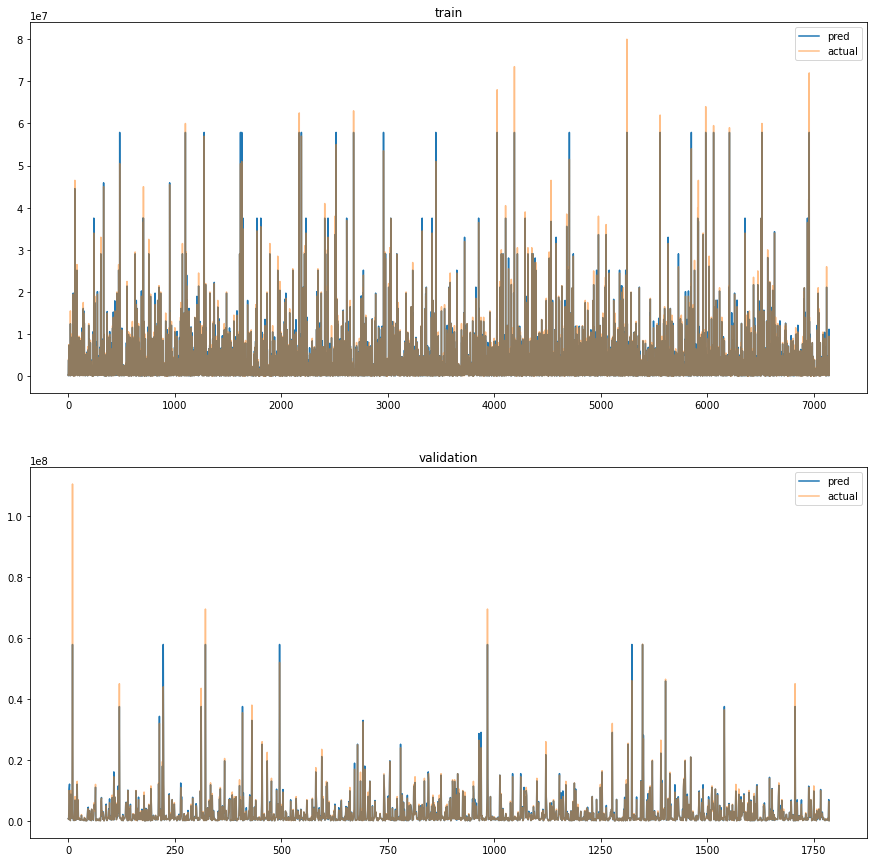

In [34]:
fig, ax = plt.subplots(2,1,figsize=(15,15))

ax1 = plt.subplot(2,1,1)
ax1.plot(sta_train_pred, label='pred')
ax1.plot(y_train.values, label='actual', alpha=0.5)
ax1.legend(loc='upper right')
ax1.set_title('train')

ax2 = plt.subplot(2,1,2)
ax2.plot(sta_valid_pred, label='pred')
ax2.plot(y_valid.values, label='actual', alpha=0.5)
ax2.legend(loc='upper right')
ax2.set_title('validation')

plt.show()

In [35]:
print('< train >')
print('RMSE : ', rmse(y_train,sta_train_pred))
print('MAPE : ', mean_absolute_percentage_error(y_train, sta_train_pred))

print('< validation >')
print('RMSE : ', rmse(y_valid,sta_valid_pred))
print('MAPE : ', mean_absolute_percentage_error(y_valid, sta_valid_pred))

< train >
RMSE :  653902.3831709503
MAPE :  0.1036089041548554
< validation >
RMSE :  1481744.488640994
MAPE :  0.11539799620910728


### 모델 성능 비교

In [36]:
print('< train >')
print('RF RMSE : ', rmse(y_train,forest_train_pred))
print('LGBM RMSE : ', rmse(y_train,lgb_train_pred))
print('CatBoost RMSE : ', rmse(y_train,cat_train_pred))
print('NGB RMSE : ', rmse(y_train,ngb_train_pred))
print('Voting Ensemble RMSE : ', rmse(y_train,ens_train_pred))
print('Stacking Ensemble RMSE : ', rmse(y_train,sta_train_pred))

print('< validation >')
print('RF RMSE : ', rmse(y_valid,forest_valid_pred))
print('LGBM RMSE : ', rmse(y_valid,lgb_valid_pred))
print('CatBoost RMSE : ', rmse(y_valid,cat_valid_pred))
print('NGB RMSE : ', rmse(y_valid,ngb_valid_pred))
print('Voting Ensemble RMSE : ', rmse(y_valid,ens_valid_pred))
print('Stacking Ensemble RMSE : ', rmse(y_valid,sta_valid_pred))

< train >
RF RMSE :  422138.7190544275
LGBM RMSE :  803938.6148276745
CatBoost RMSE :  403852.5996946302
NGB RMSE :  507641.4910071695
Voting Ensemble RMSE :  424406.7511910345
Stacking Ensemble RMSE :  653902.3831709503
< validation >
RF RMSE :  1129193.968778086
LGBM RMSE :  1557358.2406706705
CatBoost RMSE :  903757.5684671779
NGB RMSE :  1044768.8513343253
Voting Ensemble RMSE :  1035769.6214476479
Stacking Ensemble RMSE :  1481744.488640994


- 예측 결과가 overfitting 되었음을 알 수 있다

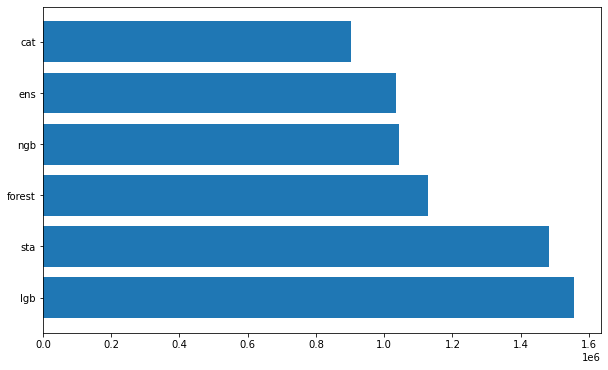

In [37]:
result = {i:0 for i in ['forest', 'lgb', 'cat', 'ngb', 'ens', 'sta']}

result['forest'] = rmse(y_valid,forest_valid_pred)
result['lgb'] = rmse(y_valid,lgb_valid_pred)
result['cat'] = rmse(y_valid,cat_valid_pred)
result['ngb'] = rmse(y_valid,ngb_valid_pred)
result['ens'] = rmse(y_valid,ens_valid_pred)
result['sta'] = rmse(y_valid,sta_valid_pred)
temp = sorted(result.items(), key=lambda item:item[1], reverse=True)
result = {i:j for i,j in temp}

plt.figure(figsize=(10,6))
plt.barh(np.arange(len(result.keys())), result.values())
plt.yticks(np.arange(len(result.keys())), result.keys())
plt.show()

### submission 파일 생성

In [38]:
submission  = pd.read_csv('../../../이적료_예측/submission.csv')
submission['value'] = cat_test_pred

In [39]:
submission.head()

,id,value
0,1,5.716710e+07
1,2,7.724462e+07
2,4,7.113776e+07
3,5,7.113776e+07
4,6,5.276645e+07


In [40]:
submission.to_csv('../../../이적료_예측/0611_cat_dh.csv',index = False)